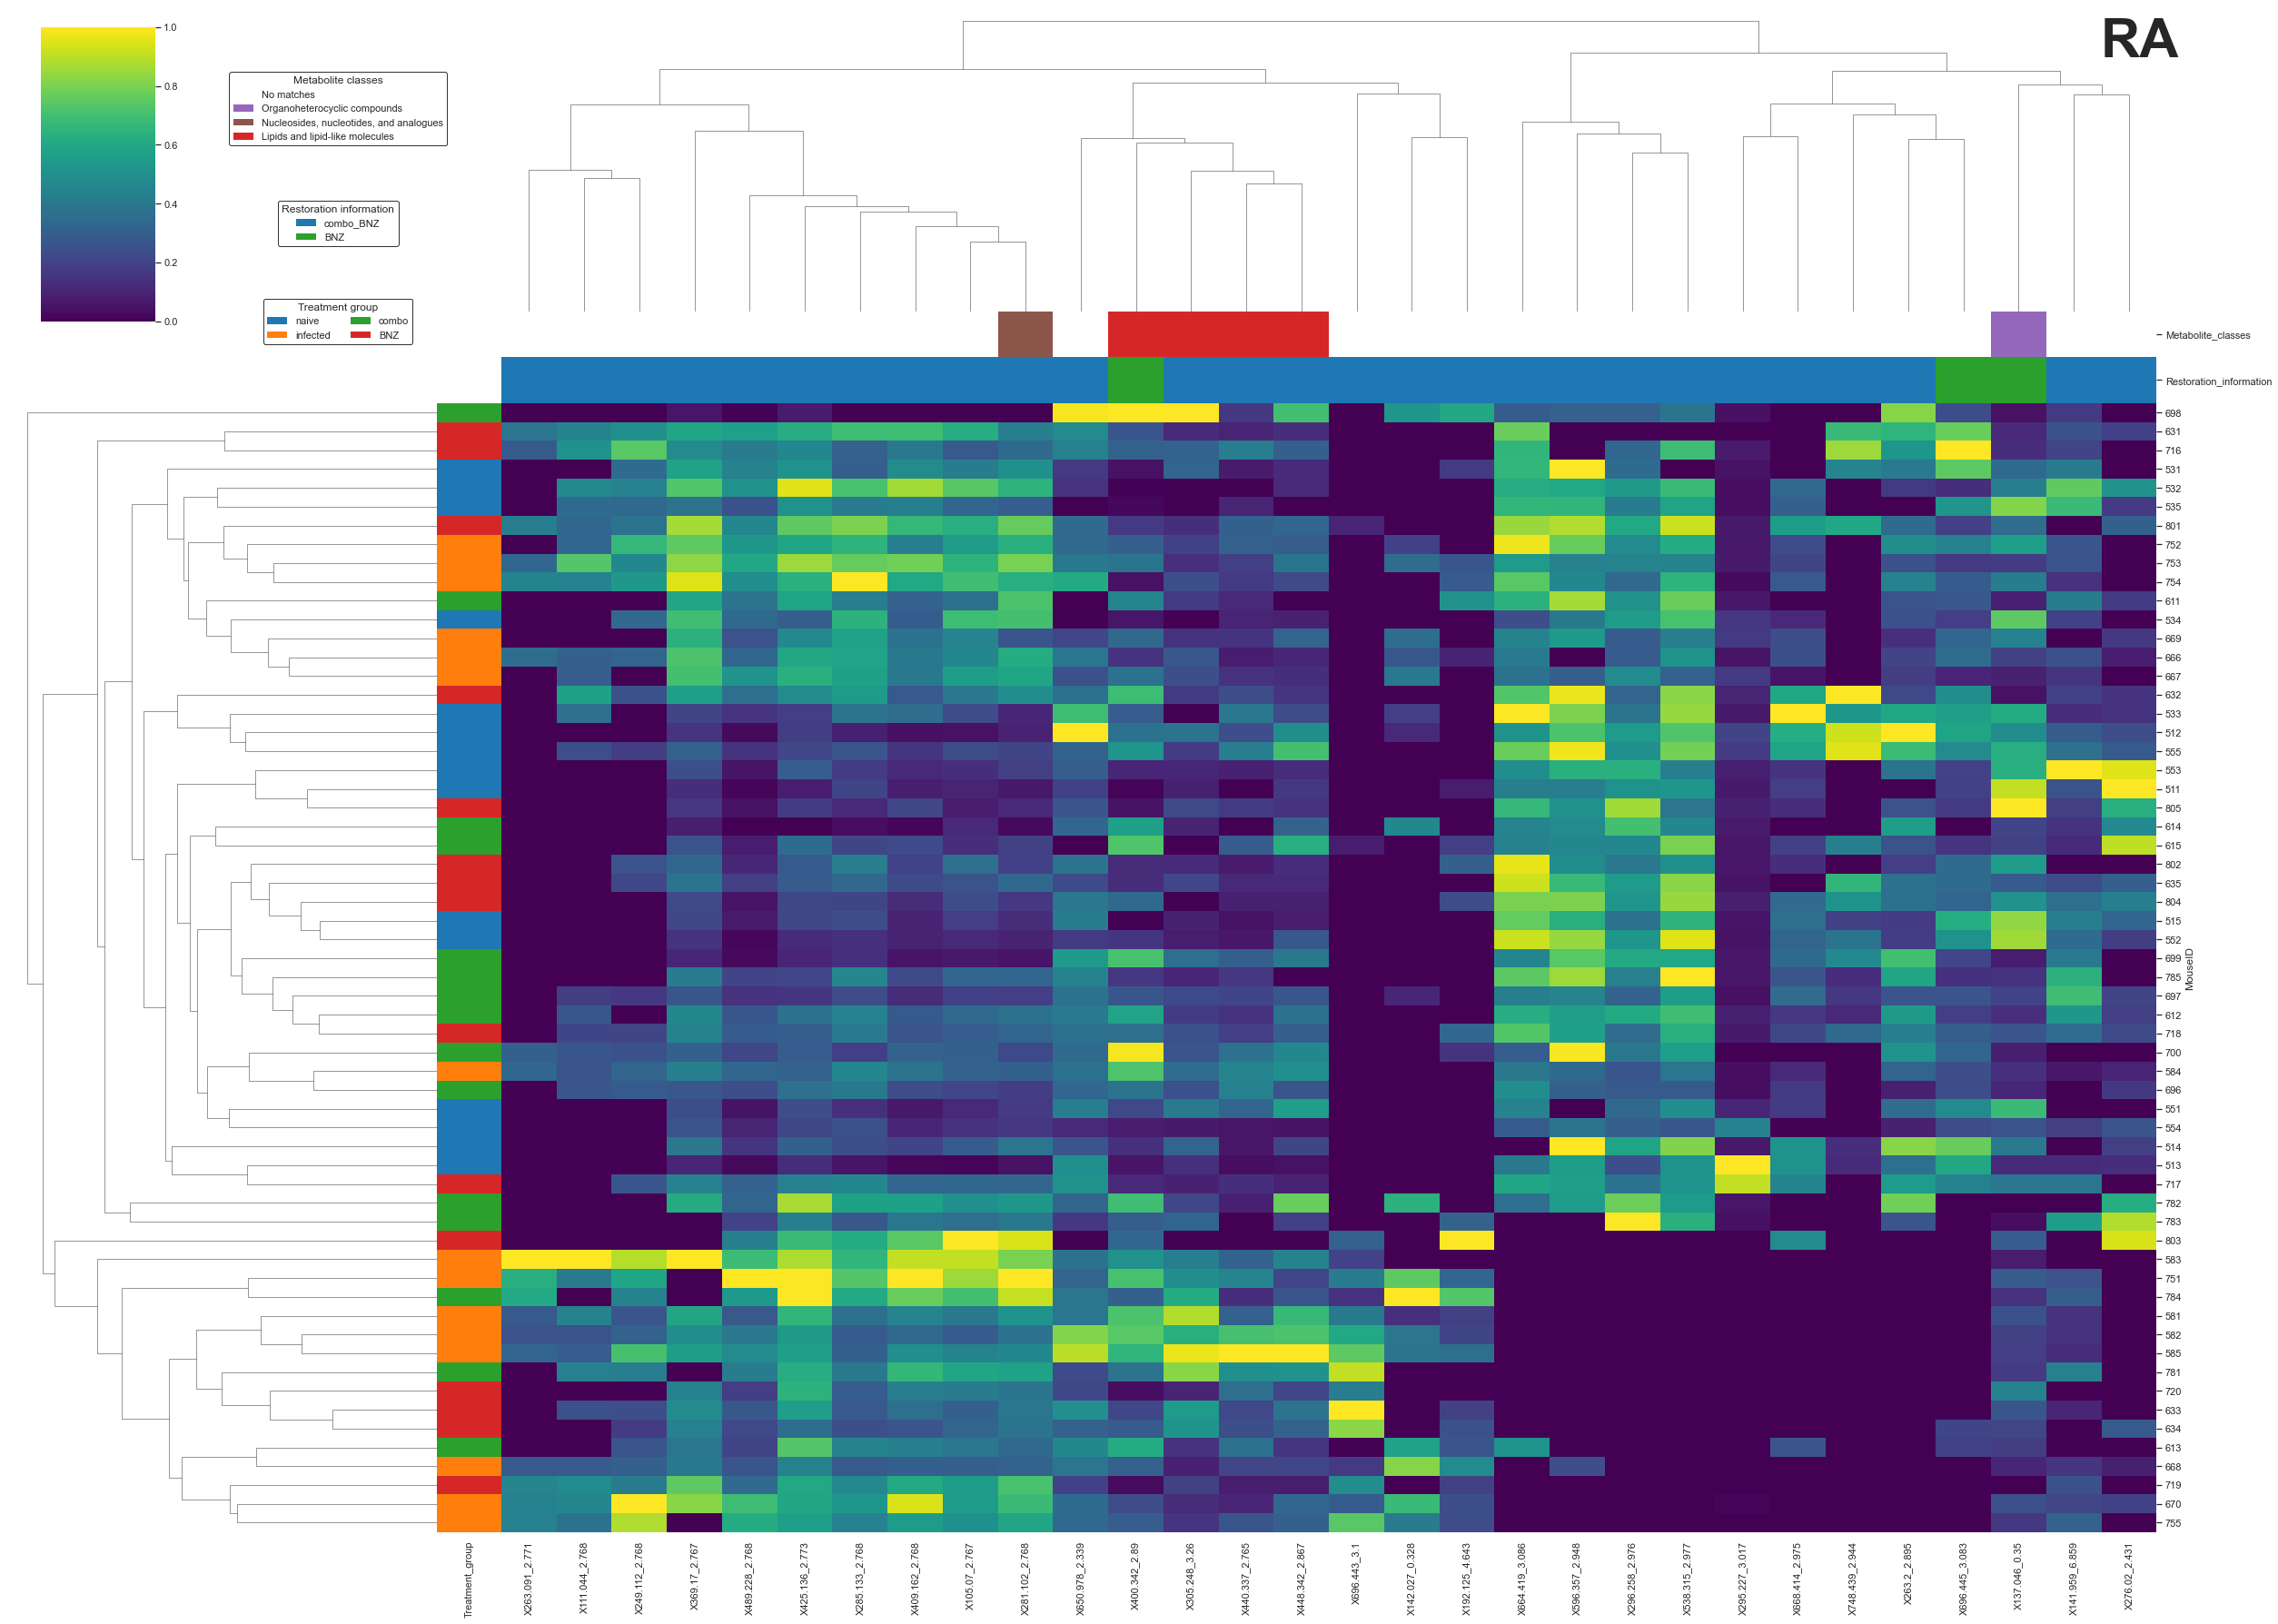

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from matplotlib.pyplot import gcf

# import the metadata-feature-table file, keep one factor column. 
# samples in rows and features in columns.
data_a = pandas.read_csv("RA-metadata-feature-table.csv")
data_a = data_a.set_index('MouseID')

# import superclass information from molnetenhancer data.
# features in rows.
data_b = pandas.read_csv("RA-annotation.csv")
data_b = data_b.set_index(['filename'])

# row color for groups classified in metadata.
# choose the column you want to map the color for heatmap row colorbar.
Treatmentgroup = data_a.pop("Treatment_group")
lut_row = {'naive':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 
           'infected':(1.0, 0.4980392156862745, 0.054901960784313725), 
           'combo':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 
           'BNZ':(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}
row_colors = Treatmentgroup.map(lut_row)

# column color mapping.
# its better to use superclass from molnetenhancer data.
# change CF_superclass to classes for column name in data.
mass_class_series = data_b.pop("Metabolite_classes")
# column color for different classes from molnetenhancer data.
lut_col = {'No matches':(1, 1, 1),
           'Benzenoids':(1.0, 0.4980392156862745, 0.054901960784313725), 
           'Organic acids and derivatives':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 
           'Lipids and lipid-like molecules':(0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 
           'Organoheterocyclic compounds':(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
           'Nucleosides, nucleotides, and analogues':(0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
           'Phenylpropanoids and polyketides':(0.8901960784313725, 0.4666666666666667, 0.7607843137254902), 
           'Organic nitrogen compounds':(0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
           'Organic oxygen compounds':(0.7372549019607844, 0.7411764705882353, 0.13333333333333333)}
col_colors_1 = mass_class_series.map(lut_col)

# add colorbar for recovered or un-recovered metabolites
recover_series = data_b.pop("Restoration_information")
lut_col_2 = {'combo_BNZ':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 
             'combo':(1.0, 0.4980392156862745, 0.054901960784313725), 
             'BNZ':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 
             'not_restored':(1, 1, 1)}
col_colors_2 = recover_series.map(lut_col_2)

col_colors = pandas.DataFrame(col_colors_1).join(pandas.DataFrame(col_colors_2))

# plot the heatmap by seaborn clustermap method.
g = sns.clustermap(data_a, cmap = "viridis", standard_scale = 1,
                   row_colors = row_colors,col_colors = col_colors,
                   row_cluster = True, col_cluster = True,
                   xticklabels = True, yticklabels = True,
                   figsize = (35, 25))

# add legend for rows groups and column groups.
for label_row in Treatmentgroup.unique():
    g.ax_row_dendrogram.bar(0, 0, color = lut_row[label_row], label = label_row, linewidth = 0)

l1 = g.ax_row_dendrogram.legend(title = 'Treatment group', loc = "center", facecolor = 'white', edgecolor = "black", ncol = 2, bbox_to_anchor = (0.15, 0.8), bbox_transform = gcf().transFigure)

for label_col in mass_class_series.unique():
    g.ax_col_dendrogram.bar(0, 0, color = lut_col[label_col], label = label_col, linewidth = 0)

l2 = g.ax_col_dendrogram.legend(title = 'Metabolite classes', loc = "center", facecolor = 'white', edgecolor = "black", ncol = 1, bbox_to_anchor = (0.15, 0.93), bbox_transform = gcf().transFigure)
    
# if I want to add the 3rd legend, there is a way:
third_legend = []
for label_col_2 in recover_series.unique():
    x = g.ax_row_dendrogram.bar(0, 0, color=lut_col_2[label_col_2], label=label_col_2, linewidth=0)
    third_legend.append(x)

# add the legend
l3 = plt.legend(third_legend, recover_series.unique(), loc="center", title='Restoration information',facecolor = 'white', edgecolor = "black", ncol = 1, bbox_to_anchor=(0.15, 0.86), bbox_transform=gcf().transFigure)

plt.text(18, 0.9, 'RA', fontsize = 60, weight='bold')

# save the plot to PDF
plt.savefig("RA-heatmap-treatment-data.pdf", dpi = 300, bbox_inches = 'tight')
plt.savefig("RA-heatmap-treatment-data.png", dpi = 300, bbox_inches = 'tight')